In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [79]:
df = pd.read_csv('/content/drive/MyDrive/data/pretest_data.csv')

### 0. 데이터 전처리


In [80]:
df.head(1).transpose()

,0
video_id,V-0db
channel_id,CH49ta0
published_date,2021-07-01
category_name,Entertainment
duration,PT8M20S
tags,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...
description,BTS performs their hit songs ‘Dynamite’ and ‘B...
on_trending_date,2021-07-03
off_trending_date,2021-07-04
on_rank,13


In [81]:
# shape 확인
df.shape

(2644, 25)

In [82]:
# 결측값 확인
# tags가 없는 데이터 360개, description 없는 데이터 40개
df.isna().sum()

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

In [83]:
df.dtypes

video_id                    object
channel_id                  object
published_date              object
category_name               object
duration                    object
tags                        object
description                 object
on_trending_date            object
off_trending_date           object
on_rank                      int64
off_rank                     int64
on_views                     int64
off_views                    int64
on_likes                     int64
off_likes                    int64
on_dislikes                  int64
off_dislikes                 int64
on_comments                  int64
off_comments                 int64
on_channel_subscribers       int64
off_channel_subscribers      int64
on_channel_total_views       int64
off_channel_total_views      int64
on_channel_total_videos      int64
off_channel_total_videos     int64
dtype: object

In [84]:
# 날짜 칼럼 datetime으로 변환
for col in ['published_date','on_trending_date','off_trending_date']:
  df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')
df.dtypes

video_id                            object
channel_id                          object
published_date              datetime64[ns]
category_name                       object
duration                            object
tags                                object
description                         object
on_trending_date            datetime64[ns]
off_trending_date           datetime64[ns]
on_rank                              int64
off_rank                             int64
on_views                             int64
off_views                            int64
on_likes                             int64
off_likes                            int64
on_dislikes                          int64
off_dislikes                         int64
on_comments                          int64
off_comments                         int64
on_channel_subscribers               int64
off_channel_subscribers              int64
on_channel_total_views               int64
off_channel_total_views              int64
on_channel_

In [85]:
#월별 칼럼 생성
df['month'] = df['published_date'].dt.month

In [86]:
#주별 칼럼 생성
df['week'] = df['published_date'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [87]:
# 중복 없는지 검사 
df['video_id'].nunique()

2643

In [88]:
display(df[df['video_id'].duplicated()])

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,month,week
535,VBSBm,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456,7,27


In [89]:
# Id가 고유 값이 아니었다..? (잘못 수집된듯)
df[df['video_id'] == 'VBSBm']

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,month,week
534,VBSBm,CH0VR2v,2021-05-07,Entertainment,PT11M6S,요리|레시피|육식|고기|육식맨|고기요리|YOOXICMAN|짜장면|자장면|짜장|고기짜...,"※ 오늘 영상에 등장하는 모든 식재료, 조리도구, 업장, TV프로그램, 브랜드, 서...",2021-05-09,2021-05-10,40,...,1458,1568,652000,652000,94094934,94383615,90,90,5,18
535,VBSBm,CHF4Wxd,2021-07-09,News & Politics,PT1M56S,MBC|MBC뉴스|뉴스데스크|newsdesk|뉴스투데이|newstoday|8시뉴스|...,전남 순천의 한 어린이집에서 원생을 마중 나온 선생님이 경사로에 밀린 학부모의 차량...,2021-07-11,2021-07-14,3,...,16067,17655,1430000,1440000,3130819202,3151554338,112154,112456,7,27


In [90]:
df1 = df.copy()

### EDA


In [ ]:
# 2021년 3월 25일부터 2021년 7월 29일까지의 업로드 된 비디오 데이터
df['published_date'].sort_values()

2432   2021-03-25
1593   2021-03-26
445    2021-03-26
1372   2021-03-26
1663   2021-03-26
          ...    
2340   2021-07-29
2035   2021-07-29
666    2021-07-29
1057   2021-07-29
1242   2021-07-29
Name: published_date, Length: 2644, dtype: datetime64[ns]

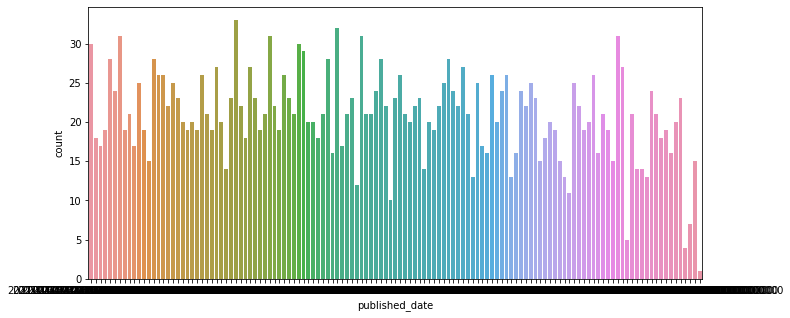

In [ ]:
# 일일 몇개씩 수집됐을까?
plt.figure(figsize=(11,5))
sns.countplot(x='published_date', data=df);

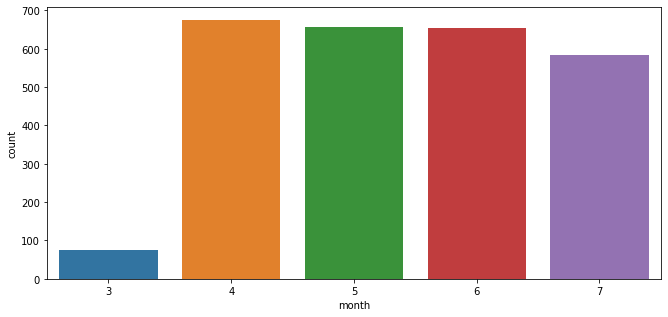

In [ ]:
# 업로드 기간별 분포도
plt.figure(figsize=(11,5)) 
sns.countplot(x='month', data=df);

In [ ]:
# 카테고리 갯수 15
df['category_name'].unique(), len(df['category_name'].unique())

(array(['Entertainment', 'Sports', 'Music', 'People & Blogs',
        'Science & Technology', 'Education', 'Howto & Style',
        'News & Politics', 'Gaming', 'Comedy', 'Pets & Animals',
        'Travel & Events', 'Film & Animation', 'Autos & Vehicles',
        'Nonprofits & Activism'], dtype=object), 15)

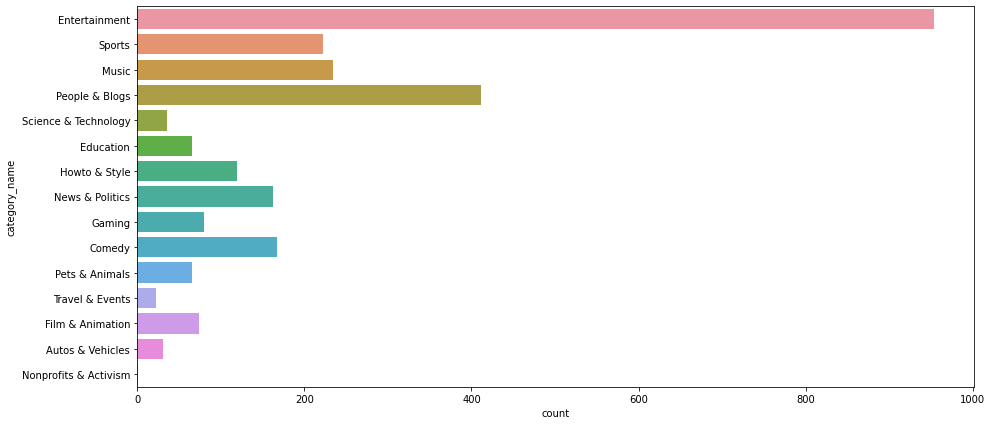

In [ ]:
# Entertainment가 가장 많이 차지하고 있음
plt.figure(figsize=(15,7))
ax = sns.countplot(y="category_name", data=df)

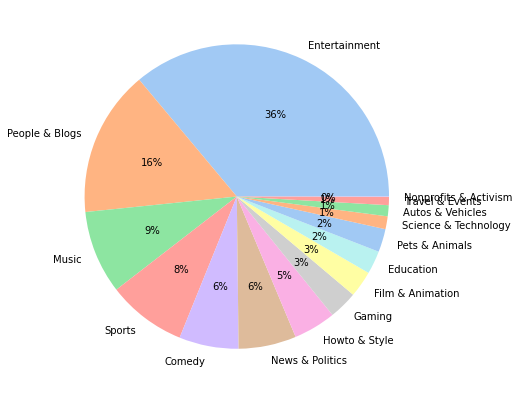

In [ ]:
#create pie chart
lab = df['category_name'].value_counts().reset_index()['index']
col = df['category_name'].value_counts().reset_index()['category_name']
plt.figure(figsize=(7,7))
colors = sns.color_palette('pastel')
plt.pie(col, labels=lab, colors=colors, autopct='%.0f%%')
plt.show()

In [ ]:
# 채널 갯수 940개
len(df['channel_id'].unique())

940

### 1. 데이터 타입별 시각화


#### 전체 기간 카테고리 > 채널 > 비디오 개수 

In [ ]:
# 전체 기간 카테고리 > 채널 > 비디오 개수 
# 시각화에 필요한 데이터 필터링
df_viz = df[['video_id','channel_id','category_name']]

In [ ]:
df_viz.head()

,video_id,channel_id,category_name
0,V-0db,CH49ta0,Entertainment
1,V-1XL,CHZVD--,Entertainment
2,V-4fa,CH9w-h_,Entertainment
3,V-5ip,CHUQVGX,Sports
4,V-5jn,CHhI3EX,Sports


In [ ]:
# 카테고리별 > 채널별 비디오 개수
uploads_by_chan_cat = df_viz.groupby(['category_name','channel_id']).count().reset_index()
uploads_by_chan_cat

,category_name,channel_id,video_id
0,Autos & Vehicles,CH-IBt8,1
1,Autos & Vehicles,CH2xkO7,2
2,Autos & Vehicles,CH5f97D,2
3,Autos & Vehicles,CHDpnvN,2
4,Autos & Vehicles,CHH5U89,2
...,...,...,...
965,Travel & Events,CHPDdt9,2
966,Travel & Events,CHPll9Z,2
967,Travel & Events,CHa0aTy,2
968,Travel & Events,CHlRNDV,7


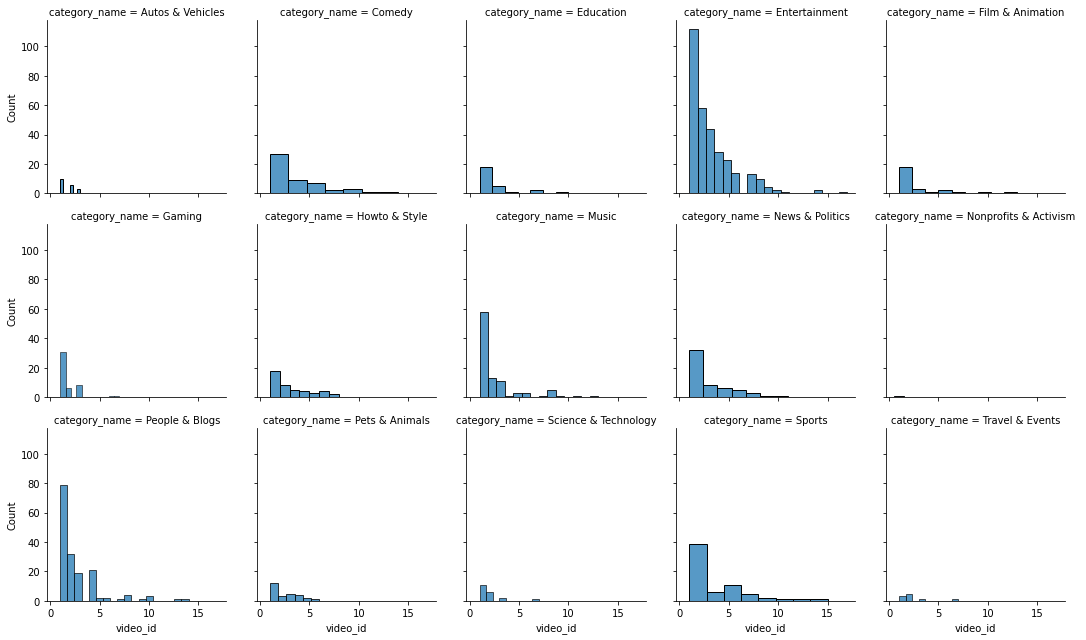

In [ ]:
# 카테고리별, 채널별 비디오 개수를 histogram으로 확인
# 한 채널에서 10개가 넘는 비디오 개수가 선정되는 경우 존재 (Comedy, Entertainment, Film&Animation, Music, News&Politics, People&Blogs, Sports)
g = sns.FacetGrid(uploads_by_chan_cat, col="category_name", col_wrap=5);
g.map(sns.histplot,"video_id");
g.add_legend();

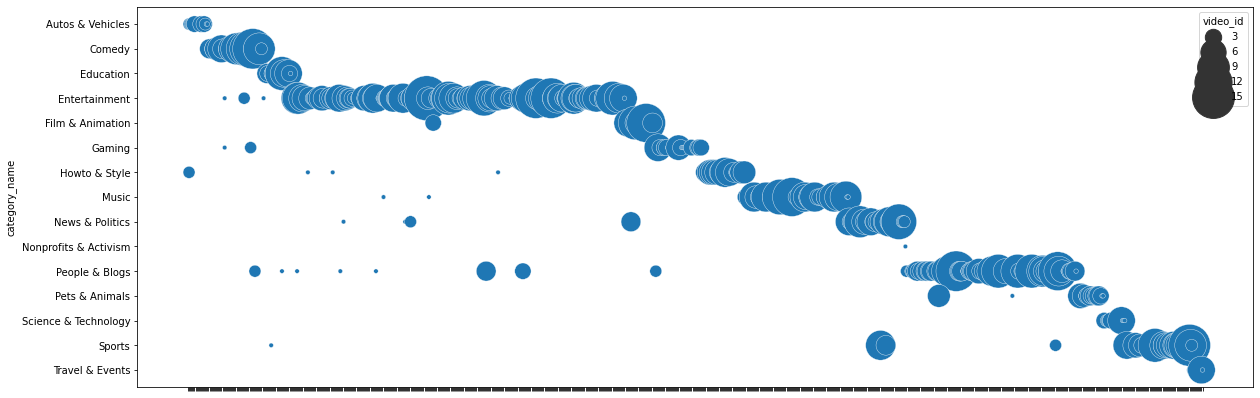

In [ ]:
plt.figure(figsize=(20,7))
ax = sns.scatterplot(
    data=uploads_by_chan_cat, x="channel_id", y='category_name', size="video_id", legend=True, sizes=(20, 2000));
ax.set(xticklabels=[]);
ax.set(xlabel=None);

In [ ]:
fig = px.scatter(uploads_by_chan_cat.reset_index(), x="channel_id", y="category_name", size='video_id', color='category_name',
                 hover_name="channel_id")
fig.show()

In [ ]:
# Entertainment


1. entertainment
2. people & blogs
3. sports, music
4. news, comedy, howto, 
5. science, edu, gaming, pets, travel, film, autos, nonprofits 

In [117]:
# Sports, music
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=("Gaming", "Film & Animation", "Education", "Pets & Animals",
                    "Science & Technology", "Autos & Vehicles", "Travel & Events", "Nonprofits & Activism"))

fig.add_trace(go.Bar(x=gm.reset_index()["channel_id"], y=gm.reset_index()["video_id"]),
              row=1, col=1)

fig.add_trace(go.Bar(x=fa.reset_index()["channel_id"], y=fa.reset_index()["video_id"]),
              row=1, col=2)

fig.add_trace(go.Bar(x=ed.reset_index()["channel_id"], y=ed.reset_index()["video_id"]),
              row=2, col=1)

fig.add_trace(go.Bar(x=pa.reset_index()["channel_id"], y=pa.reset_index()["video_id"]),
              row=2, col=2)

fig.add_trace(go.Bar(x=st.reset_index()["channel_id"], y=st.reset_index()["video_id"]),
              row=3, col=1)

fig.add_trace(go.Bar(x=av.reset_index()["channel_id"], y=av.reset_index()["video_id"]),
              row=3, col=2)

fig.add_trace(go.Bar(x=te.reset_index()["channel_id"], y=te.reset_index()["video_id"]),
              row=4, col=1)

fig.add_trace(go.Bar(x=na.reset_index()["channel_id"], y=na.reset_index()["video_id"]),
              row=4, col=2)

fig.update_layout(height=800, width=900, showlegend=False,
                  title_text="Most trending channel by Category")
fig.update_xaxes(tickangle=40, color='grey', tickfont_size=10, row=1, col=1)
fig.update_xaxes(tickangle=40, color='grey', tickfont_size=10, row=2, col=1)
fig.update_xaxes(tickangle=40, color='grey', tickfont_size=10, row=3, col=1)
fig.update_xaxes(tickangle=40, color='grey', tickfont_size=10, row=4, col=1)
fig.update_xaxes(tickangle=40, color='grey', tickfont_size=10, row=1, col=2)
fig.update_xaxes(tickangle=40, color='grey', tickfont_size=10, row=2, col=2)
fig.update_xaxes(tickangle=40, color='grey', tickfont_size=10, row=3, col=2)
fig.update_xaxes(tickangle=40, color='grey', tickfont_size=10, row=4, col=2)


fig.show()

In [120]:
ed.reset_index()['video_id'].mean()

2.4074074074074074

In [123]:
a.reset_index()['video_id'].mean()

3.0576923076923075

In [114]:
ed = df_viz.groupby(['category_name', 'channel_id']).count() \
.sort_values(['category_name','video_id'], ascending=[True,False]).query('category_name == "Education"')
ed

video_id
category_name channel_id          
Education     CHicKQU           10
              CHl7MKZ            7
              CHuh6Br            7
              CH7F6UD            4
              CHBJs8l            3
              CHHpIHu            3
              CHJ7LVh            3
              CHnaGfD            3
              CHvW8no            3
              CH1-lwA            2
              CH6xugt            2
              CHCt6iN            2
              CHD902z            2
              CH-9RQC            1
              CH5YHB-            1
              CHBM86J            1
              CHMFk5S            1
              CHO0OSA            1
              CHPvwqh            1
              CHZ4T91            1
              CHcWXel            1
              CHgheNM            1
              CHiV4_c            1
              CHjPqSb            1
              CHma37f            1
              CHnLO88            1
              CHznImS            1

In [92]:
fig = px.bar(pb.reset_index(), x="channel_id", y="video_id", 
             text='video_id',
             title="category : People & Blogs - most trending channel")
fig.update_xaxes(tickangle=40, color='grey', tickfont_size=10)
fig.update_layout(xaxis= dict(tickmode='array'))
fig.show()

In [96]:
fig = px.bar(a.reset_index(), x="channel_id", y="video_id", 
             text='video_id', labels={'number of videos'},
             title="category : Entertainment - most trending channel")
fig.update_xaxes(tickangle=40, color='grey', tickfont_size=10)
fig.update_layout(xaxis= dict(tickmode='array'))
fig.show()

In [ ]:
mu = df_viz.groupby(['category_name', 'channel_id']).count() \
.sort_values(['category_name','video_id'], ascending=[True,False]).reset_index()
mu

,category_name,channel_id,video_id
0,Autos & Vehicles,CHPbxBh,3
1,Autos & Vehicles,CHiubh7,3
2,Autos & Vehicles,CHrOl7I,3
3,Autos & Vehicles,CH2xkO7,2
4,Autos & Vehicles,CH5f97D,2
...,...,...,...
965,Travel & Events,CHPll9Z,2
966,Travel & Events,CHa0aTy,2
967,Travel & Events,CH673sG,1
968,Travel & Events,CHMZO-3,1


In [ ]:
df[df['channel_id'] == 'CHH3mJ-']

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos,month,week
280,V5dQV,CHH3mJ-,2021-05-13,News & Politics,PT7M4S,중앙일보|손정민|한강 의대생|손정민 친구|한강 CCTV|의대생 친구|한강의대생|목격...,한강에서 숨진 채 발견된 의대생 고(故) 손정민(22)씨의 실종 당일인 지난달 25...,2021-05-15,2021-05-19,1,...,10082,12037,100000,104000,84479218,86635542,5148,5161,5,19
591,VCV-Y,CHH3mJ-,2021-03-29,News & Politics,PT1M3S,중앙일보|롯데월드몰|롯데월드몰그림|롯데월드그림|그라피티|거리의소음,서울 송파구 롯데월드몰에 전시 중인 세계적인 작가의 그라피티 작품이 훼손된 채 발견...,2021-03-31,2021-04-02,5,...,2000,3204,86300,86500,74053583,74661644,4961,4971,3,13
954,VL-11,CHH3mJ-,2021-04-26,Film & Animation,PT3M24S,중앙일보|윤여정|아카데미 시상식|오스카|여우조연상|윤여정 인터뷰|윤여정 여우조연상|...,“60살 넘어서부터 저 혼자 약속한 게 있어요. 사람을 보고 사람이 좋으면 하자. ...,2021-04-28,2021-04-29,24,...,248,275,88600,88700,76612422,76710170,5079,5082,4,17
1106,VP38i,CHH3mJ-,2021-05-13,News & Politics,PT41S,중앙일보|박신영|박신영 교통사고|박신영 블랙박스|박신영 아나운서|블박영상|신호위반|...,지난 10일 발생한 박신영(31) 아나운서의 교통사고 현장 모습이 담긴 블랙박스 영...,2021-05-15,2021-05-15,11,...,5298,5298,100000,100000,84479218,84479218,5148,5148,5,19
2425,VuzLg,CHH3mJ-,2021-05-07,News & Politics,PT45S,중앙일보|김흥국|김흥국 교통사고|김흥국 뺑소니|뺑소니 사고|오토바이|오토바이 뺑소니...,가수 김흥국(62)씨가 대낮에 차량 운전 중 신호를 위반하고 오토바이와 접촉사고가 ...,2021-05-08,2021-05-11,7,...,4215,5524,89800,90700,77377811,78576819,5120,5128,5,18


#### 월별 > 카테고리 > 채널 > 비디오 개수

In [ ]:
# 시각화에 필요한 데이터 필터링
df_viz = df[['video_id','channel_id','category_name', 'month']]
df_viz

,video_id,channel_id,category_name,month
0,V-0db,CH49ta0,Entertainment,7
1,V-1XL,CHZVD--,Entertainment,6
2,V-4fa,CH9w-h_,Entertainment,7
3,V-5ip,CHUQVGX,Sports,6
4,V-5jn,CHhI3EX,Sports,7
...,...,...,...,...
2639,VzwuB,CH69uMh,Comedy,5
2640,VzxuL,CHhbE5O,Comedy,7
2641,VzygR,CHO4RG1,Science & Technology,4
2642,Vzz6W,CHYeeEw,Entertainment,4


In [ ]:
df_viz.groupby(['month', 'category_name', 'channel_id']).count()

video_id  on_rank
month category_name   channel_id                   
3     Comedy          CHEUL40            1        1
                      CHV3i3l            1        1
                      CHgBLs7            1        1
                      CHyCL5k            1        1
      Education       CH5YHB-            1        1
...                                    ...      ...
7     Sports          CHpjOmw            1        1
                      CHqsKWT            1        1
                      CHtm_Qo            4        4
                      CHunsfa            1        1
      Travel & Events CHlRNDV            5        5

[1680 rows x 2 columns]

In [ ]:
uploads_by_mon = df_viz.groupby(['month', 'category_name', 'channel_id']).count().reset_index()
uploads_by_mon

,month,category_name,channel_id,video_id
0,3,Comedy,CHEUL40,1
1,3,Comedy,CHV3i3l,1
2,3,Comedy,CHgBLs7,1
3,3,Comedy,CHyCL5k,1
4,3,Education,CH5YHB-,1
...,...,...,...,...
1675,7,Sports,CHpjOmw,1
1676,7,Sports,CHqsKWT,1
1677,7,Sports,CHtm_Qo,4
1678,7,Sports,CHunsfa,1


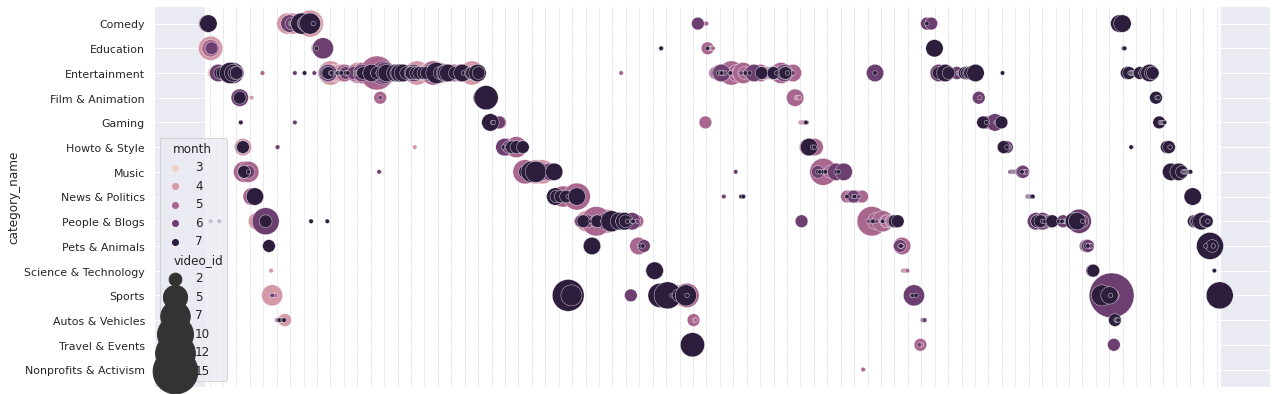

In [ ]:
# 월별 카테고리 > 채널 > 비디오 개수
plt.figure(figsize=(20,7))
ax = sns.scatterplot(
    data=uploads_by_mon, x="channel_id", y='category_name', size="video_id",hue='month',legend=True, sizes=(20, 2000));
ax.set(xticklabels=[]);
ax.set(xlabel=None);

In [ ]:
df_com = uploads_by_mon.query('category_name == "Comedy"')
df_com

,month,category_name,channel_id,video_id
0,3,Comedy,CHEUL40,1
1,3,Comedy,CHV3i3l,1
2,3,Comedy,CHgBLs7,1
3,3,Comedy,CHyCL5k,1
75,4,Comedy,CH0SoPw,3
...,...,...,...,...
1338,7,Comedy,CHhbE5O,3
1339,7,Comedy,CHhvXm5,3
1340,7,Comedy,CHmzMtX,4
1341,7,Comedy,CHt_UFh,1


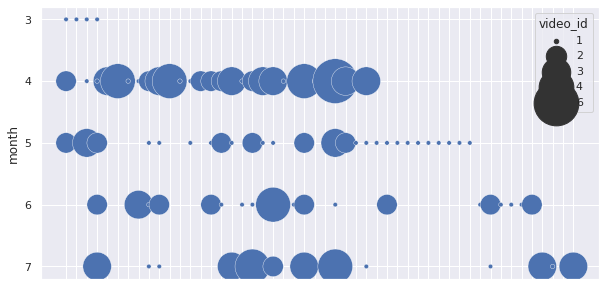

In [ ]:
# Comedy
plt.figure(figsize=(10,5))
ax = sns.scatterplot(
    data=df_com, x="channel_id", y='month', size="video_id",legend=True, sizes=(20, 2000));
ax.set(xticklabels=[]);
ax.set(xlabel=None);

In [ ]:
df_exc = uploads_by_mon.query('category_name != "Entertainment"')
df_exc

,month,category_name,channel_id,video_id
0,3,Comedy,CHEUL40,1
1,3,Comedy,CHV3i3l,1
2,3,Comedy,CHgBLs7,1
3,3,Comedy,CHyCL5k,1
4,3,Education,CH5YHB-,1
...,...,...,...,...
1675,7,Sports,CHpjOmw,1
1676,7,Sports,CHqsKWT,1
1677,7,Sports,CHtm_Qo,4
1678,7,Sports,CHunsfa,1


In [ ]:
df_ent = uploads_by_mon.query('category_name == "Entertainment"')

<Figure size 1440x360 with 0 Axes>

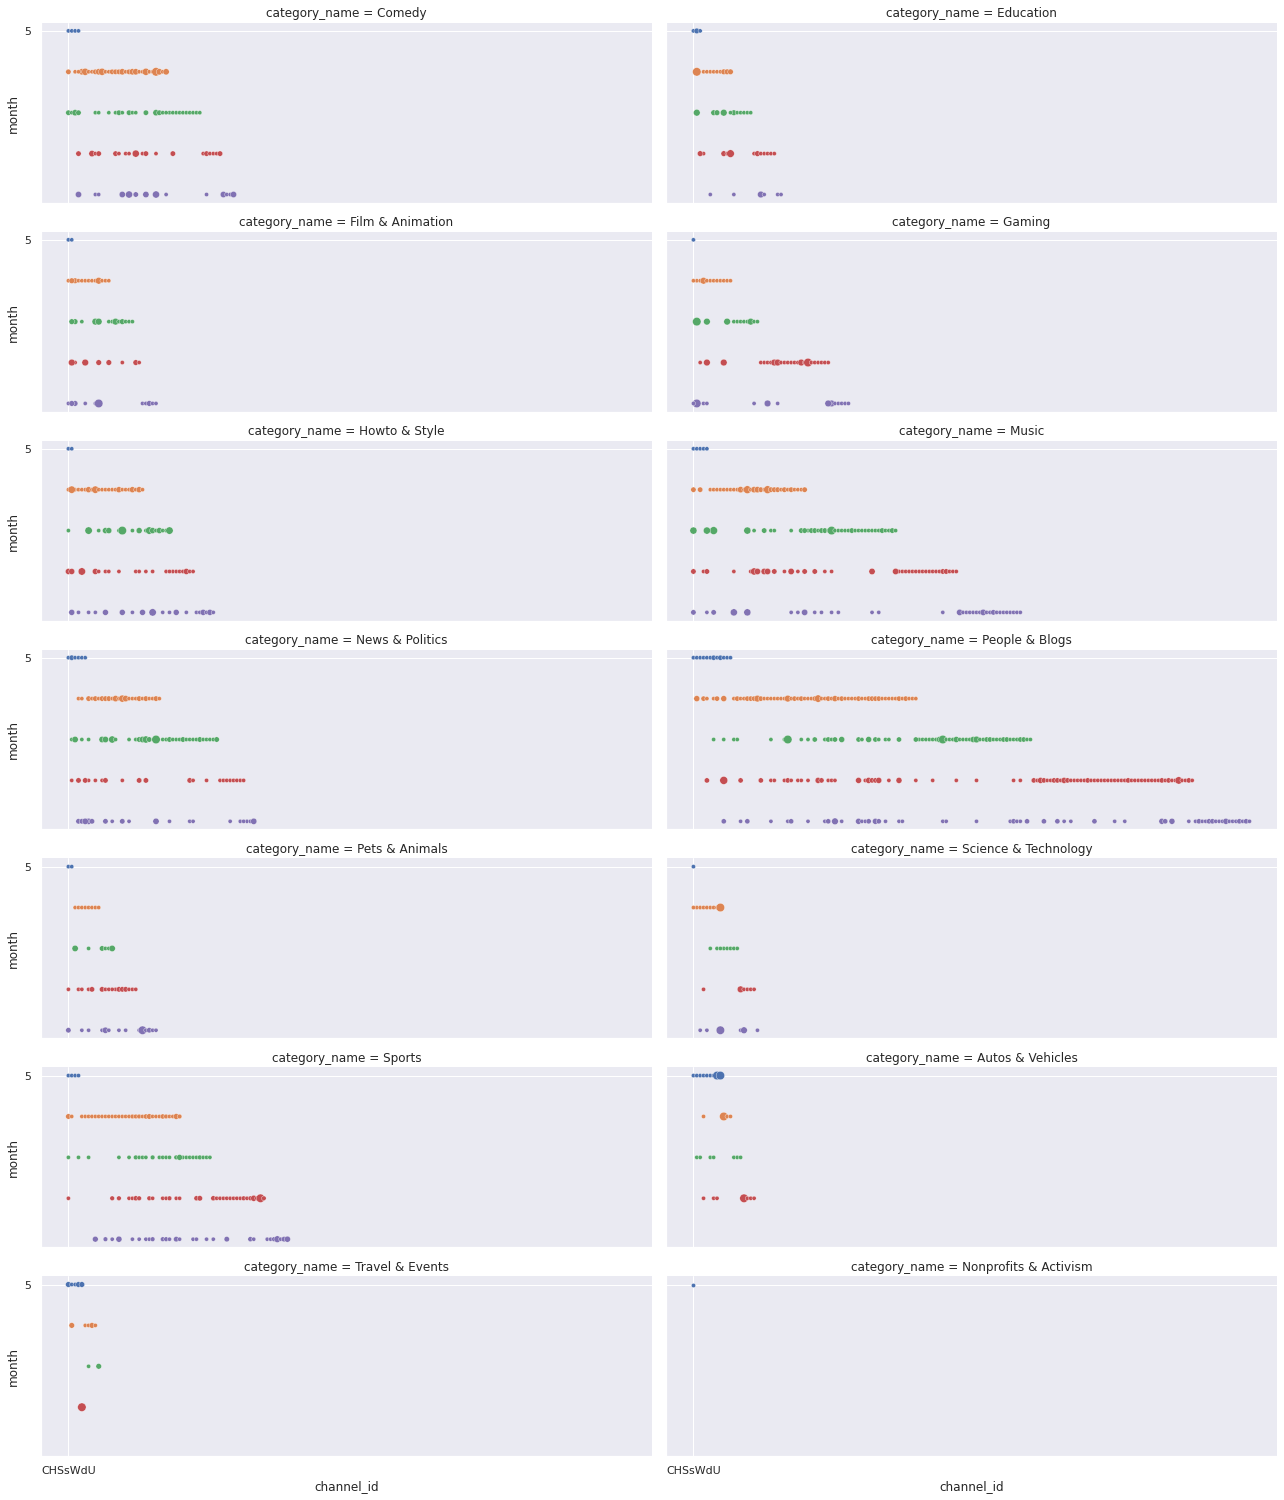

In [ ]:
plt.figure(figsize=(20,5))
g = sns.FacetGrid(df_exc, col="category_name", col_wrap=2, aspect=3)
g.map(sns.scatterplot, "channel_id", "month", 'month', 'video_id')

In [124]:
df['category_name'].unique()

array(['Entertainment', 'Sports', 'Music', 'People & Blogs',
       'Science & Technology', 'Education', 'Howto & Style',
       'News & Politics', 'Gaming', 'Comedy', 'Pets & Animals',
       'Travel & Events', 'Film & Animation', 'Autos & Vehicles',
       'Nonprofits & Activism'], dtype=object)

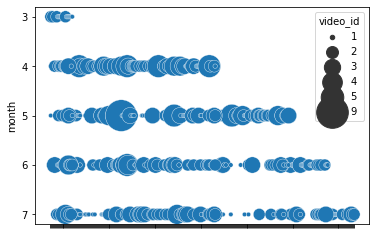

<Figure size 1440x360 with 0 Axes>

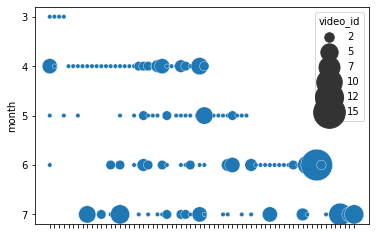

<Figure size 1440x360 with 0 Axes>

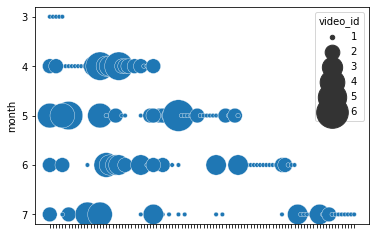

<Figure size 1440x360 with 0 Axes>

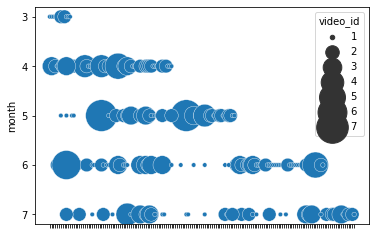

<Figure size 1440x360 with 0 Axes>

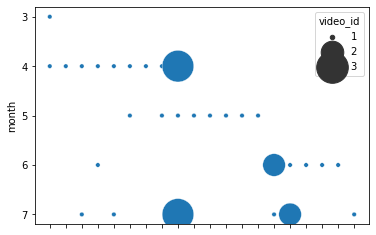

<Figure size 1440x360 with 0 Axes>

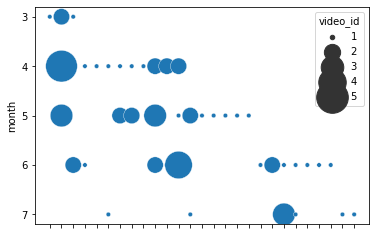

<Figure size 1440x360 with 0 Axes>

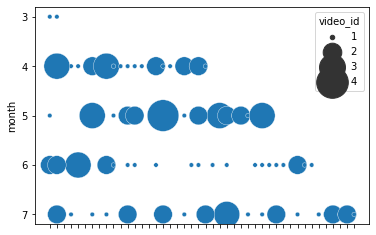

<Figure size 1440x360 with 0 Axes>

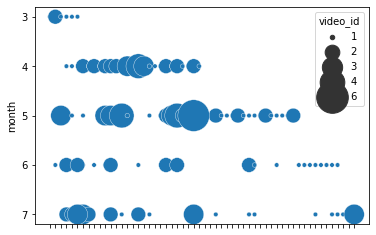

<Figure size 1440x360 with 0 Axes>

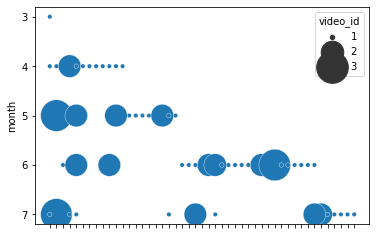

<Figure size 1440x360 with 0 Axes>

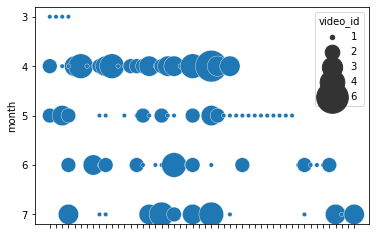

<Figure size 1440x360 with 0 Axes>

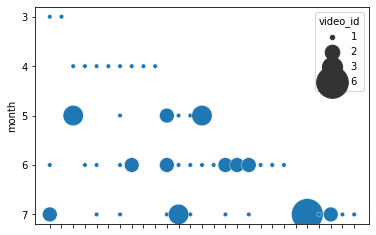

<Figure size 1440x360 with 0 Axes>

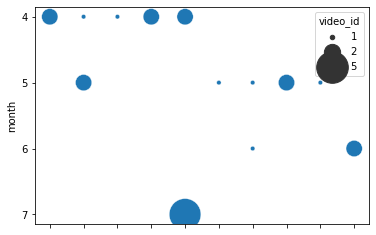

<Figure size 1440x360 with 0 Axes>

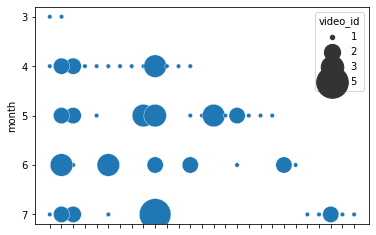

<Figure size 1440x360 with 0 Axes>

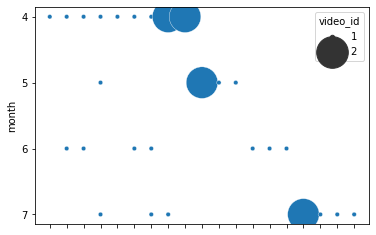

<Figure size 1440x360 with 0 Axes>

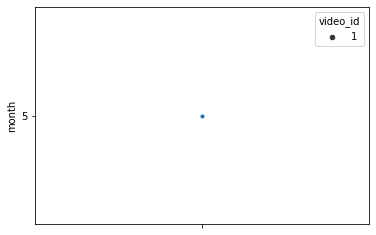

<Figure size 1440x360 with 0 Axes>

In [ ]:
for genre in df['category_name'].unique():
  ax = sns.scatterplot(
      data = uploads_by_mon[uploads_by_mon['category_name'] == genre],
      x = 'channel_id',
      y = 'month',
      size = 'video_id',
      legend = True,
      sizes=(20, 1000)
      )
  ax.set(xticklabels=[])
  ax.set(xlabel=None);
  plt.figure(figsize=(20,5))
  plt.show()

#### 월별 Top 10 채널

In [ ]:
# 시각화에 필요한 데이터 필터링
df_viz = df[['video_id','channel_id', 'month','on_rank']]
df_viz

,video_id,channel_id,month,on_rank
0,V-0db,CH49ta0,7,13
1,V-1XL,CHZVD--,6,28
2,V-4fa,CH9w-h_,7,1
3,V-5ip,CHUQVGX,6,18
4,V-5jn,CHhI3EX,7,11
...,...,...,...,...
2639,VzwuB,CH69uMh,5,2
2640,VzxuL,CHhbE5O,7,1
2641,VzygR,CHO4RG1,4,32
2642,Vzz6W,CHYeeEw,4,20


In [ ]:
# 서브 기준 설정) 평균 인기동영상 순위 (on_rank mean)
df_top10 = df_viz.groupby(['month','channel_id']) \
       .agg({'video_id':'size', 'on_rank':'mean'}) \
       .rename(columns={'video_id':'count','on_rank':'mean_rank'})
df_top10

count  mean_rank
month channel_id                  
3     CH12YJZ         1  19.000000
      CH2qVOO         1  13.000000
      CH46BbE         2  27.000000
      CH4LW3s         1  10.000000
      CH5BMQO         2  13.000000
...                 ...        ...
7     CHzCedB         3  23.666667
      CHzIOIS         1   9.000000
      CHzgNzU         2  10.000000
      CHzxXBQ         1  34.000000
      CHzz58-         1  27.000000

[1666 rows x 2 columns]

In [ ]:
df_top10 = df_top10.sort_values(['month','count','mean_rank'], ascending=[True,False,True])
df_top10

count  mean_rank
month channel_id                  
3     CHG9aFJ         2        1.5
      CHaZS_X         2        1.5
      CHicKQU         2        6.5
      CH5BMQO         2       13.0
      CHnet0I         2       23.0
...                 ...        ...
7     CHa2LU4         1       46.0
      CHEI4rb         1       47.0
      CHUK4Yj         1       47.0
      CHi-XI2         1       50.0
      CHqsPmf         1       50.0

[1666 rows x 2 columns]

In [ ]:
# 매월 가장 비디오 개수가 많은 채널 상위 10개 뽑기
# 값이 같다면, 평균 인기동영상 순위가 더 높은 채널 선정
temp = []
month_lst = []
for i in range(len(df_top10)):
    if df_top10.index[i][0] not in month_lst:
        month_lst.append(df_top10.index[i][0])
for i in month_lst:
    new = df_top10.iloc[df_top10.index.get_level_values('month') == i].head(10)
    temp.append(new)
monthly_top10 = temp[0]
for i in temp[1:]:
    monthly_top10 = monthly_top10.append(i)
monthly_top10

count  mean_rank
month channel_id                  
3     CHG9aFJ         2   1.500000
      CHaZS_X         2   1.500000
      CHicKQU         2   6.500000
      CH5BMQO         2  13.000000
      CHnet0I         2  23.000000
      CH46BbE         2  27.000000
      CHaKod3         2  27.000000
      CH920m3         2  27.500000
      CHlzB2i         1   1.000000
      CHtCiO5         1   1.000000
4     CHmzMtX         6  18.500000
      CHx6jsZ         5   3.800000
      CHfkXDY         5  12.400000
      CHLkAep         5  13.800000
      CHeSHil         5  14.000000
      CHUyfkq         5  15.000000
      CHtm_Qo         5  15.600000
      CHicKQU         5  25.800000
      CH1L79y         5  28.000000
      CHXTyJZ         5  30.800000
5     CHQ2O-i         9  16.222222
      CHDV9zg         7   3.428571
      CHIG4gr         7  11.000000
      CH9GtSL         6  15.500000
      CHsU-I-         6  26.833333
      CH3IZKs         5  12.400000
      CHPde4g         5  18.800000
      CHiwQRG         5  21.400000
      CHunsfa         5  21.400000
      CHExw7_         5  34.200000
6     CHtybqq        15  15.333333
      CHpjOmw         6   5.166667
      CHtfriF         6  14.333333
      CHUyfkq         5  15.000000
      CHuDLnJ         5  31.000000
      CHg-p3l         4   3.750000
      CHaO6TY         4   7.750000
      CHlzB2i         4  10.000000
      CHuh6Br         4  15.750000
      CHVWmCR         4  19.000000
7     CHYRrUD         9  21.777778
      CHk4XjB         6  13.333333
      CHUQVGX         6  19.000000
      CH29-Il         6  21.833333
      CHArK9M         5  12.800000
      CHszFjh         5  15.600000
      CHlRNDV         5  17.200000
      CHLkAep         4   5.750000
      CHDIB1D         4  10.000000
      CHtm_Qo         4  11.750000

In [ ]:
a = monthly_top10.reset_index().loc[:,'month':'count']

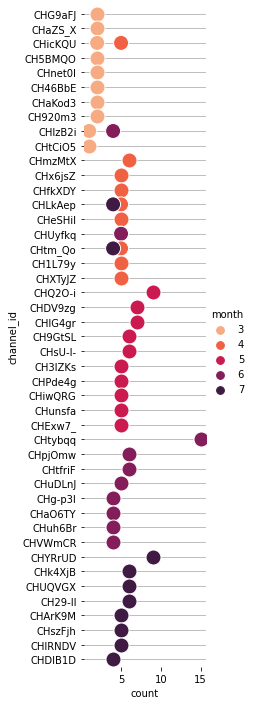

In [ ]:
g = sns.PairGrid(a, x_vars=['count'], y_vars=['channel_id'], hue='month', height=10, aspect=.25)
g.map(sns.stripplot, size=15, orient='h', jitter=False, palette='rocket_r',linewidth=1, edgecolor='w')
g.add_legend()
for ax in g.axes.flat:
  ax.xaxis.grid(False)
  ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)

#### 주별 탑5 채널

In [ ]:
# 주별 top5 채널
# 시각화에 필요한 데이터 필터링
df_viz = df[['video_id','channel_id','category_name','week','on_rank']]
df_viz
# 12 : 3월 22일 ~ 28일
# 30 : 7월 26일 ~ 8월 1일

,video_id,channel_id,category_name,week,on_rank
0,V-0db,CH49ta0,Entertainment,26,13
1,V-1XL,CHZVD--,Entertainment,25,28
2,V-4fa,CH9w-h_,Entertainment,28,1
3,V-5ip,CHUQVGX,Sports,22,18
4,V-5jn,CHhI3EX,Sports,27,11
...,...,...,...,...,...
2639,VzwuB,CH69uMh,Comedy,18,2
2640,VzxuL,CHhbE5O,Comedy,30,1
2641,VzygR,CHO4RG1,Science & Technology,16,32
2642,Vzz6W,CHYeeEw,Entertainment,17,20


In [ ]:
# 서브 기준 설정) 평균 인기동영상 순위 (on_rank mean)
df_top5 = df_viz.groupby(['week','channel_id']) \
       .agg({'video_id':'size', 'on_rank':'mean'}) \
       .rename(columns={'video_id':'count','on_rank':'mean_rank'})
df_top5

count  mean_rank
week channel_id                  
12   CH2qVOO         1       13.0
     CH7Krez         1       28.0
     CHCA4-e         1       22.0
     CHGiqkg         1       13.0
     CHIY5oU         1       25.0
...                ...        ...
30   CHrhgVH         2       24.0
     CHt_UFh         1       28.0
     CHta_NR         1       29.0
     CHyn7ao         1       21.0
     CHzIOIS         1        9.0

[2279 rows x 2 columns]

In [ ]:
df_top5 = df_top5.sort_values(['week','count','mean_rank'], ascending=[True,False,True])
df_top5

count  mean_rank
week channel_id                  
12   CHnet0I         2       23.0
     CHlzB2i         1        1.0
     CHweOkP         1        1.0
     CHkh6Tl         1        2.0
     CHriPmQ         1        4.0
...                ...        ...
30   CH3PSZi         1       38.0
     CH29-Il         1       41.0
     CHbuks6         1       42.0
     CHg7rkx         1       43.0
     CHA6KBB         1       45.0

[2279 rows x 2 columns]

In [ ]:
#매주 가장 비디오 개수가 많은 채널 상위 5개 뽑기
temp = []
weeks_lst = []
for i in range(len(df_top5)):
    if df_top5.index[i][0] not in weeks_lst:
        weeks_lst.append(df_top5.index[i][0])
for i in weeks_lst:
    new = df_top5.iloc[df_top5.index.get_level_values('week') == i].head(5)
    temp.append(new)
weekly_top5 = temp[0]
for i in temp[1:]:
    weekly_top5 = weekly_top5.append(i)
weekly_top5

count  mean_rank
week channel_id                  
12   CHnet0I         2       23.0
     CHlzB2i         1        1.0
     CHweOkP         1        1.0
     CHkh6Tl         1        2.0
     CHriPmQ         1        4.0
...                ...        ...
30   CHYRrUD         5       24.4
     CH-FQUI         3        3.0
     CHcQTRi         3       20.0
     CHDIB1D         2        2.5
     CHk4XjB         2        7.0

[95 rows x 2 columns]

In [ ]:
b = weekly_top5.reset_index().loc[:,'week':'count']

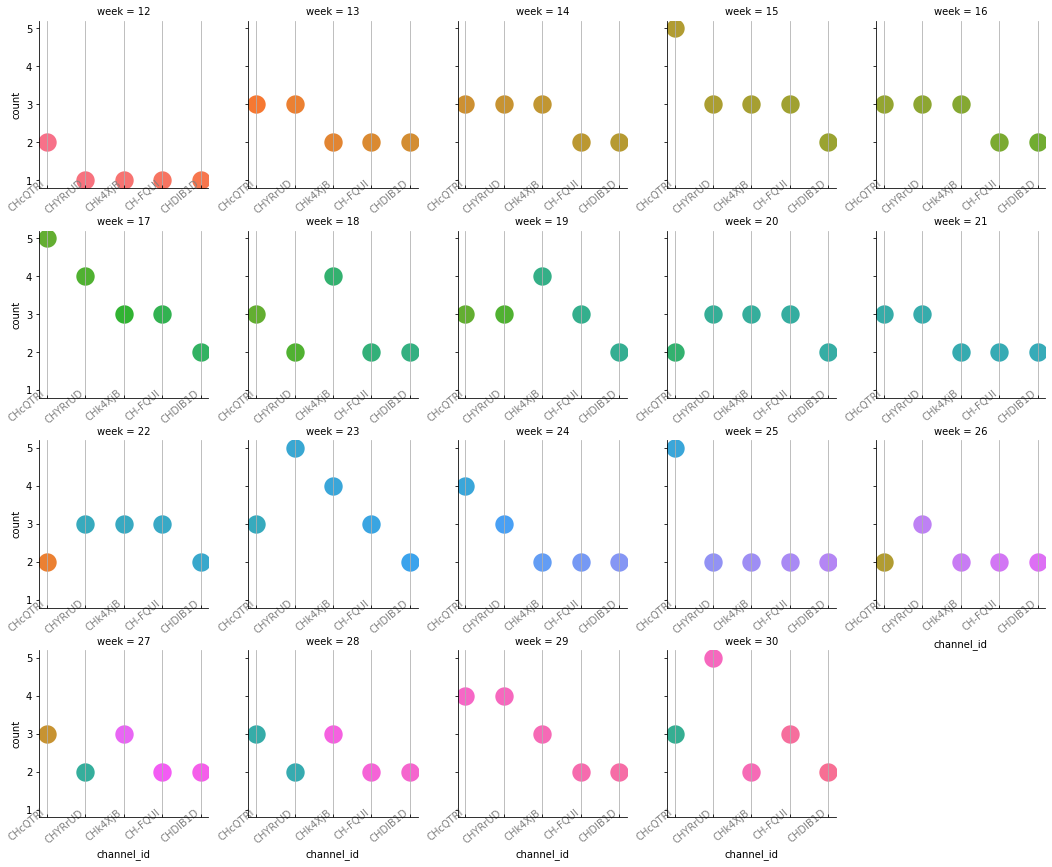

In [ ]:
g = sns.FacetGrid(b, col="week", hue='channel_id', col_wrap=5)
g.map(sns.scatterplot, "channel_id", "count", s=400)
for ax in g.axes.flat:
  ax.xaxis.grid(True)
  ax.yaxis.grid(False)
  ax.tick_params('x',labelbottom=True,direction='in', pad=-10, labelcolor='grey')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


#### 월별 카테고리별 태그 키워드 순위

In [125]:
# 시각화에 필요한 데이터 필터링
df_viz = df[['category_name','month','tags']]
df_viz

,category_name,month,tags
0,Entertainment,7,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...
1,Entertainment,6,치킨불냉면|치킨|불냉면|냉면
2,Entertainment,7,NaN
3,Sports,6,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...
4,Sports,7,이천수|심판도전기|축구심판
...,...,...,...
2639,Comedy,5,아프리카tv|봉준|와꾸대장봉준|BJ|컨텐츠|클립
2640,Comedy,7,장삐쭈|삐쭈|ㅋㅋㅋ|삐쮸|장삐쮸|병맛더빙|더빙|웃긴동영상|꿀잼|신병|장삐쭈 단편선|...
2641,Science & Technology,4,아이패드 프로|아이패드 프로5|아이패드 프로 5세대|신형 아이맥|아이맥|iMac|에...
2642,Entertainment,4,고요 속의 외침|뽕숭아학당|슬기로운캠핑생활|아는형님|미스터트롯|임영웅|영탁|장민호|...


In [126]:
# 태그 결측값 drop
df_viz = df_viz.dropna()

In [127]:
# 태그 리스트화
df_viz['tokens'] = df_viz.tags.str.replace('|',',')
df_viz = df_viz.drop('tags',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [128]:
c = df_viz.groupby(['month','category_name'])['tokens'].apply(list)
c = c.reset_index()
c

,month,category_name,tokens
0,3,Comedy,"[#깨방정,#정승빈,#몰카,#미녀,#개그맨,#존잘남,#존예녀,#디스코,#깨방정디스코..."
1,3,Education,"[조승연,조승연의 탐구생활,조승연작가,조승연 작가,럭키,럭키 인디아,럭키인디아,럭키..."
2,3,Entertainment,"[아이유,아이유 신곡,아이유 코인,아이유 라일락,코인,라일락,아이유 노래,아이유 노..."
3,3,Film & Animation,"[고민툰,사연툰,썰툰,사이다툰,영상툰,animation,animations,Cart..."
4,3,Gaming,"[리그오브레전드,리그 오브 레전드,LoL,Leagueoflegends,League ..."
...,...,...,...
64,7,People & Blogs,"[브이로그,커플vlog,부부,유혜주, 타투,타투이스트,냐아,으냐,단하나,김경은,이하..."
65,7,Pets & Animals,"[실험영상,조개,민물조개,납자루,어항,물생활,물고기키우기,생물,관찰,생물도감, 애니..."
66,7,Science & Technology,"[4K,4K 모니터,주연테크,가성비 모니터,갓성비,4K 모니터 입문용,입문용,언박싱..."
67,7,Sports,"[이천수,심판도전기,축구심판, SPOTV,스포티비,아르헨티나,브라질,코파,네이마르,..."


In [153]:
z = ','.join(c.query('month == 7').iloc[2]['tokens'])
z = z.split(',')

In [154]:
from collections import Counter
tags = Counter(z).most_common(40)

In [131]:
from wordcloud import WordCloud

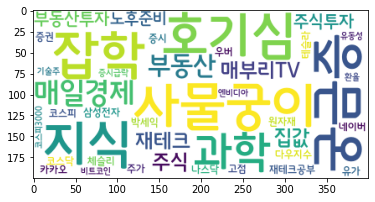

In [155]:
wc = WordCloud(font_path='/content/drive/MyDrive/data/GodoM.otf',background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))
plt.imshow(cloud)
plt.show()

In [ ]:
tags

[('유재석', 4),
 ('KBS', 4),
 ('아이유', 3),
 ('kbs', 3),
 ('eng', 3),
 ('idol', 3),
 ('라일락', 2),
 ('IU', 2),
 ('LILAC', 2),
 ('런닝맨', 2),
 ('김종국', 2),
 ('이광수', 2),
 ('지석진', 2),
 ('하하', 2),
 ('송지효', 2),
 ('전소민', 2),
 ('양세찬', 2),
 ('runningman', 2),
 ('RunninMan', 2),
 ('SBS', 2),
 ('sbs', 2),
 ('Kim Jong Kook', 2),
 ('Lee Kwang Soo', 2),
 ('Ji Seok Jin', 2),
 ('Yoo Jae Suk', 2),
 ('Song Ji Hyo', 2),
 ('Haha', 2),
 ('Gary', 2),
 ('Yang Se Chan', 2),
 ('Jeon So Min', 2),
 ('신규진', 2),
 ('김보성', 2),
 ('의리', 2),
 ('뒷머리', 2),
 ('핫이슈', 2),
 ('유퀴즈', 2),
 ('유퀴즈온더블럭', 2),
 ('조세호', 2),
 ('먹방', 2),
 ('kbsworld', 2)]

In [158]:
df.head(1).transpose()

,0
video_id,V-0db
channel_id,CH49ta0
published_date,2021-07-01 00:00:00
category_name,Entertainment
duration,PT8M20S
tags,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...
description,BTS performs their hit songs ‘Dynamite’ and ‘B...
on_trending_date,2021-07-03 00:00:00
off_trending_date,2021-07-04 00:00:00
on_rank,13


In [ ]:
if 

In [208]:
# 각 칼럼별로 on/off 차이 알아보기
# views, likes, dislikes, comments, subs, total views, total videos간의 차이 칼럼 만들기 
# comments, subs의 경우 0으로 나누는 경우가 생기므로 이럴때만 1로 교체하여 나누기
df['views_d'] = (df['off_views'] - df['on_views'])/df['on_views'] * 100
df['likes_d'] = (df['off_likes'] - df['on_likes'])/df['on_likes'] * 100
df['dislikes_d'] = (df['off_dislikes'] - df['on_dislikes'])/df['on_dislikes'] * 100

df['total_views_d'] = (df['off_channel_total_views'] - df['on_channel_total_views'])/df['on_channel_total_views'] * 100
df['total_vids_d'] = (df['off_channel_total_videos'] - df['on_channel_total_videos'])/df['on_channel_total_videos'] * 100


In [ ]:
try:
  df['comments_d'] = (df['off_comments'] - df['on_comments'])/(df['on_comments']) * 100
except df['comments_d'] == 

df['subs_d'] = \
(df['off_channel_subscribers'] - df['on_channel_subscribers'])/df['on_channel_subscribers'] * 100

In [199]:
df['on_channel_subscribers'].value_counts()

0          64
2070000    12
1600000    11
1540000    11
109000     11
           ..
5730000     1
21200       1
25200       1
30000       1
5810000     1
Name: on_channel_subscribers, Length: 1319, dtype: int64

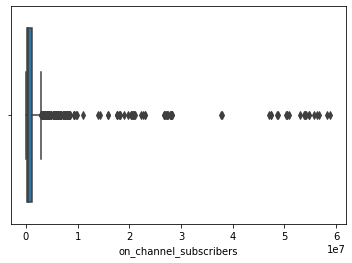

In [203]:
sns.boxplot(x=df['on_channel_subscribers'])

In [204]:
df['on_comments'].value_counts()

0        17
333       7
416       6
985       6
461       5
         ..
31818     1
1554      1
1787      1
841       1
57460     1
Name: on_comments, Length: 1920, dtype: int64

In [164]:
df.head(2).transpose()

,0,1
video_id,V-0db,V-1XL
channel_id,CH49ta0,CHZVD--
published_date,2021-07-01 00:00:00,2021-06-24 00:00:00
category_name,Entertainment,Entertainment
duration,PT8M20S,PT9M17S
tags,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,치킨불냉면|치킨|불냉면|냉면
description,BTS performs their hit songs ‘Dynamite’ and ‘B...,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...
on_trending_date,2021-07-03 00:00:00,2021-06-26 00:00:00
off_trending_date,2021-07-04 00:00:00,2021-06-27 00:00:00
on_rank,13,28


In [165]:
df.columns.values

array(['video_id', 'channel_id', 'published_date', 'category_name',
       'duration', 'tags', 'description', 'on_trending_date',
       'off_trending_date', 'on_rank', 'off_rank', 'on_views',
       'off_views', 'on_likes', 'off_likes', 'on_dislikes',
       'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos', 'month',
       'week', 'views_d', 'likes_d', 'dislikes_d', 'comments_d', 'subs_d',
       'total_views_d', 'total_vids_d'], dtype=object)

In [174]:
list(df.columns[-7:])

['views_d',
 'likes_d',
 'dislikes_d',
 'comments_d',
 'subs_d',
 'total_views_d',
 'total_vids_d']

In [209]:
# on/off 차이 칼럼중 가장 큰 값은? 
df_diff = df[list(df.columns[-7:])]
df_diff

,views_d,likes_d,dislikes_d,comments_d,subs_d,total_views_d,total_vids_d
0,15.275772,4.518452,28.030303,3.345223,0.000000,0.217584,0.050446
1,27.639759,14.660862,27.272727,8.310249,0.159490,0.475190,0.000000
2,67.811240,42.313470,43.827160,44.540230,0.000000,0.137345,0.207178
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,31.361562,17.061735,27.678571,12.372635,3.361345,8.774952,0.000000
...,...,...,...,...,...,...,...
2639,72.755964,23.582358,84.073587,48.694612,-0.990099,0.303809,-0.013057
2640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2642,38.746556,23.202301,22.388060,22.173913,0.335570,0.351379,0.650759


In [217]:
lst = [df[i].mean() for i in df_diff.columns]
lst

[37.81472682332418,
 22.015869674424977,
 40.71955842497339,
 inf,
 inf,
 4.591548855895771,
 0.41405867932670876]

In [227]:
lst[:3] + lst[5:]

[37.81472682332418,
 22.015869674424977,
 40.71955842497339,
 4.591548855895771,
 0.41405867932670876]

In [228]:
my_df = pd.DataFrame(data=lst[:3] + lst[5:], index=['views','likes','dislikes','total_views','total_vids'], columns=['Differences'])
display(pd.DataFrame(my_df))

,Differences
views,37.814727
likes,22.015870
dislikes,40.719558
total_views,4.591549
total_vids,0.414059


In [188]:
df['comments_d'].value_counts()

0.000000     741
16.666667      4
36.363636      3
20.000000      3
10.872675      2
            ... 
17.551020      1
26.859670      1
10.149750      1
58.056266      1
22.173913      1
Name: comments_d, Length: 1869, dtype: int64

In [193]:
display(df['comments_d'].isna())

0       False
1       False
2       False
3       False
4       False
        ...  
2639    False
2640    False
2641    False
2642    False
2643    False
Name: comments_d, Length: 2644, dtype: bool

In [230]:
df.columns

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos', 'month', 'week',
       'views_d', 'likes_d', 'dislikes_d', 'comments_d', 'subs_d',
       'total_views_d', 'total_vids_d'],
      dtype='object')

In [243]:
# 칼럼 간 상관관계
df_ = df[['video_id','channel_id','published_date','category_name','duration','on_rank','on_views','on_likes','on_dislikes','on_comments','on_channel_subscribers','on_channel_total_views','on_channel_total_videos', 'dislove']]


In [244]:
df_.corr()

,on_rank,on_views,on_likes,on_dislikes,on_comments,on_channel_subscribers,on_channel_total_views,on_channel_total_videos,dislove
on_rank,1.000000,-0.173836,-0.135078,-0.176558,-0.075361,-0.145809,-0.172543,-0.098883,-0.135832
on_views,-0.173836,1.000000,0.902141,0.693729,0.841637,0.632384,0.492606,0.013871,0.902769
on_likes,-0.135078,0.902141,1.000000,0.689899,0.796527,0.771795,0.513542,-0.023047,0.999978
on_dislikes,-0.176558,0.693729,0.689899,1.000000,0.435057,0.577527,0.459258,-0.013693,0.694639
on_comments,-0.075361,0.841637,0.796527,0.435057,1.000000,0.435764,0.341050,-0.007968,0.795471
on_channel_subscribers,-0.145809,0.632384,0.771795,0.577527,0.435764,1.000000,0.784184,0.048609,0.772187
on_channel_total_views,-0.172543,0.492606,0.513542,0.459258,0.341050,0.784184,1.000000,0.234382,0.514483
on_channel_total_videos,-0.098883,0.013871,-0.023047,-0.013693,-0.007968,0.048609,0.234382,1.000000,-0.023026
dislove,-0.135832,0.902769,0.999978,0.694639,0.795471,0.772187,0.514483,-0.023026,1.000000


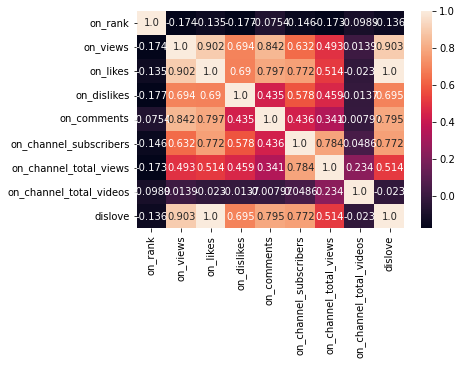

In [257]:
sns.heatmap(df_.corr(),annot=True, fmt=".3");

In [256]:
weight = 1.5
df['dislove'] = df['on_dislikes'] + df['on_likes'] * weight

In [ ]:
sns.heatmap(df_.corr(), annot=True)